In [7]:
import numpy as np
import helpy
import matplotlib.pyplot as plt

In [8]:
import velocity

In [9]:
prefix = '/Users/zhejun/Document/Result/0718_order_two_escape/result'

In [10]:
data = helpy.load_data(prefix)
data['o'] = (data['o'] + np.pi)%(2 * np.pi)   # flip the detected orientation
tracksets = helpy.load_tracksets(data, run_track_orient=True, run_repair = 'interp')
track_prefix = {prefix: tracksets}

In [151]:
v_diff = velocity.compile_noise(track_prefix, width = (0,), cat = False, side = 36, fps = 2.5, 
                           ring = True, x0 = x0, y0= y0, skip = 1, grad = False)

In [153]:
v_diff = v_diff[prefix]

In [154]:
diff_data = helpy.load_framesets(v_diff)
vd = list()
for f, fdata in diff_data.iteritems():
        vring = fdata['vring']
        vd.append(vring.mean())
vd = vd[100:-100]

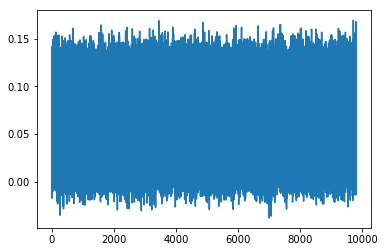

In [160]:
plt.plot(vd)
plt.show()

In [161]:
print np.mean(vd)
print np.std(vd)

0.0660799
0.0509655


In [142]:
v = velocity.compile_noise(track_prefix, width = (0.65,), cat = False, side = 36, fps = 2.5, 
                           ring = True, x0 = x0, y0= y0, skip = 1, grad = False)

In [143]:
meta = helpy.load_meta(prefix)

In [144]:
x0, y0, R = meta.get('boundary')

In [145]:
vdata = v[prefix]

In [146]:
frame_data = helpy.load_framesets(vdata)

In [147]:
vs = list()
for f, fdata in frame_data.iteritems():
        vring = fdata['vring']
        vs.append(vring.mean())
vs = vs[100:-100]

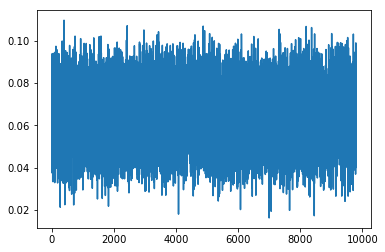

In [148]:
plt.plot(vs)
plt.show()

In [149]:
np.std(vs)

0.015478083

In [150]:
np.mean(vs)

0.065506853

In [57]:
width

array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,
        18.5,  19. ,  19.5])

In [56]:
width = np.arange(0.5, 20, 0.5)

In [58]:
result = list()
for iwidth in width:
    v = velocity.compile_noise(track_prefix, width = (iwidth,), cat = False, side = 36, fps = 2.5, ring = True,
                               x0 = x0, y0= y0, skip = 1, grad = False)
    vdata = v[prefix]
    frame_data = helpy.load_framesets(vdata)
    vs = list()
    for f, fdata in frame_data.iteritems():
            vring = fdata['vring']
            vs.append(vring.mean())
    vs = vs[100:-100]
    result.append(np.std(vs))

In [59]:
plt.scatter(width, result)

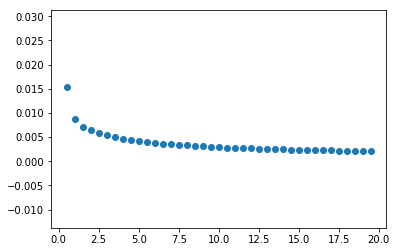

In [60]:
plt.show()

In [61]:
width2 = np.arange(0.5, 1, 0.05)

In [62]:
result2 = list()

In [63]:
for iwidth in width2:
    v = velocity.compile_noise(track_prefix, width = (iwidth,), cat = False, side = 36, fps = 2.5,
                               ring = True, x0 = x0, y0= y0, skip = 1, grad = False)
    vdata = v[prefix]
    frame_data = helpy.load_framesets(vdata)
    vs = list()
    for f, fdata in frame_data.iteritems():
            vring = fdata['vring']
            vs.append(vring.mean())
    vs = vs[100:-100]
    result2.append(np.std(vs))

In [64]:
plt.scatter(width2, result2)

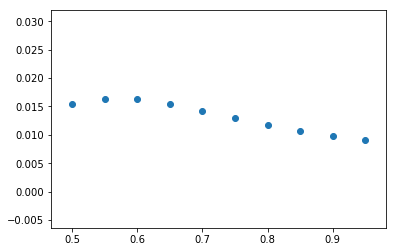

In [65]:
plt.show()

In [184]:
vgrad = velocity.compile_noise(track_prefix, width = (10,), cat = False, side = 36, fps = 2.5, 
                               ring = True, x0 = x0, y0= y0, skip = 1, grad = True)

In [185]:
vgrad.keys()

['/Users/zhejun/Document/Result/0718_order_two_escape/result']

In [186]:
vgrad_data = vgrad[prefix]

In [187]:
grad_frame_data = helpy.load_framesets(vgrad_data)

In [188]:
grad_vs = list()
for f, fdata in grad_frame_data.iteritems():
        vring = fdata['vring']
        grad_vs.append(vring.mean())

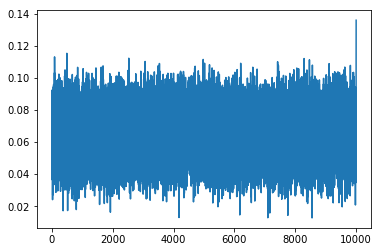

In [189]:
plt.plot(grad_vs)
plt.show()

In [190]:
np.mean(grad_vs)

0.066016734

In [191]:
np.std(grad_vs)

0.018147625

In [83]:
result2

[0.015378163,
 0.016387956,
 0.016292181,
 0.015478083,
 0.014281213,
 0.012966529,
 0.011718709,
 0.010646844,
 0.0097951908,
 0.0091562886]

In [84]:
result

[0.015378163,
 0.0086944308,
 0.0071562664,
 0.0063964087,
 0.0058209444,
 0.0053613256,
 0.0049831793,
 0.0046662781,
 0.004397131,
 0.0041659456,
 0.0039653238,
 0.003789614,
 0.0036344677,
 0.0034965051,
 0.003373049,
 0.0032619406,
 0.0031614075,
 0.0030699742,
 0.0029864006,
 0.0029096357,
 0.0028387874,
 0.0027730956,
 0.0027119147,
 0.0026546961,
 0.0026009742,
 0.0025503547,
 0.0025025052,
 0.0024571435,
 0.002414031,
 0.0023729645,
 0.0023337707,
 0.0022963004,
 0.0022604237,
 0.0022260274,
 0.0021930113,
 0.0021612856,
 0.0021307704,
 0.0021013927,
 0.0020730866]

In [85]:
width2

array([ 0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95])

In [86]:
a = [1,2,3]

In [87]:
a[0] = [2,3]

In [89]:
a[0] = 2, 3 ,4

In [90]:
a

[(2, 3, 4), 2, 3]

In [98]:
standard_deviation = result2 + result[1:]

In [92]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

In [99]:
a = width2

In [100]:
a

array([ 0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95])

In [102]:
gaussian_width = np.append(a, width[1:])

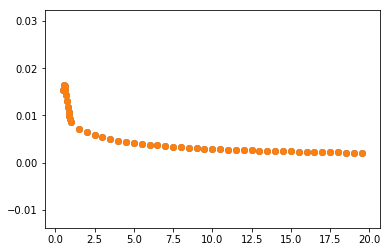

In [104]:
plt.scatter(gaussian_width, standard_deviation)
plt.show()

In [138]:
a = [1,4,5,9,3,10]

In [249]:
standard_deviation

[0.015378163,
 0.016387956,
 0.016292181,
 0.015478083,
 0.014281213,
 0.012966529,
 0.011718709,
 0.010646844,
 0.0097951908,
 0.0091562886,
 0.0086944308,
 0.0071562664,
 0.0063964087,
 0.0058209444,
 0.0053613256,
 0.0049831793,
 0.0046662781,
 0.004397131,
 0.0041659456,
 0.0039653238,
 0.003789614,
 0.0036344677,
 0.0034965051,
 0.003373049,
 0.0032619406,
 0.0031614075,
 0.0030699742,
 0.0029864006,
 0.0029096357,
 0.0028387874,
 0.0027730956,
 0.0027119147,
 0.0026546961,
 0.0026009742,
 0.0025503547,
 0.0025025052,
 0.0024571435,
 0.002414031,
 0.0023729645,
 0.0023337707,
 0.0022963004,
 0.0022604237,
 0.0022260274,
 0.0021930113,
 0.0021612856,
 0.0021307704,
 0.0021013927,
 0.0020730866]

In [163]:
np.mean(grad_vs)*2.5

0.066030160523951054

In [183]:
reload(velocity)

<module 'velocity' from '/Users/zhejun/Document/Research Code/track/velocity.py'>

In [173]:
np.std(grad_vs)

0.018125612

In [192]:
0.018147625 /0.007

2.592517857142857

In [193]:
atest = np.random.rand(100)

In [195]:
atest.std()

0.30659578787311947

In [196]:
btest = atest*10

In [197]:
btest.std()

3.065957878731195

In [220]:
vg = velocity.compile_noise(track_prefix, width = (2,), cat = False, side = 36, fps = 2.5, 
                               ring = True, x0 = x0, y0= y0, skip = 1, grad = False)
vg = vg[prefix]
fgdata = helpy.load_framesets(vg)

In [221]:
gv = list()
for f, fdata in fgdata.iteritems():
        vring = fdata['vring']
        gv.append(vring.mean())

In [222]:
np.mean(gv)

0.066016734

In [223]:
np.std(gv)

0.018147627

In [207]:
0.018147625/2.5

0.00725905

In [210]:
gaussian_width

array([  0.5 ,   0.55,   0.6 ,   0.65,   0.7 ,   0.75,   0.8 ,   0.85,
         0.9 ,   0.95,   1.  ,   1.5 ,   2.  ,   2.5 ,   3.  ,   3.5 ,
         4.  ,   4.5 ,   5.  ,   5.5 ,   6.  ,   6.5 ,   7.  ,   7.5 ,
         8.  ,   8.5 ,   9.  ,   9.5 ,  10.  ,  10.5 ,  11.  ,  11.5 ,
        12.  ,  12.5 ,  13.  ,  13.5 ,  14.  ,  14.5 ,  15.  ,  15.5 ,
        16.  ,  16.5 ,  17.  ,  17.5 ,  18.  ,  18.5 ,  19.  ,  19.5 ])

In [211]:
2.  is 2

False

In [243]:
single = tracksets[27]

In [245]:
vt_single = velocity.ring_velocity_derivatives(single, width=(0.65,), side=36, fps=2.5, x0 = x0,
                              y0 = y0, skip = 1, grad = False)


In [247]:
print vt_single['vring'].mean()
print vt_single['vring'].std()

0.0655539
0.0457688


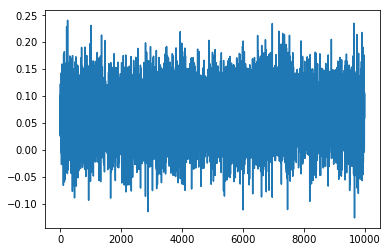

In [240]:
plt.plot(vt_single['vring'])
plt.show()

In [248]:
for track, tdata in tracksets.iteritems():
    v_single = velocity.ring_velocity_derivatives(tdata, width=(0.65,), side=36, fps=2.5, x0 = x0,
                              y0 = y0, skip = 1, grad = False)
    print v_single['vring'].std()

0.046169
0.0459433
0.0458556
0.0454418
0.0466276
0.0456774
0.0448112
0.0460109
0.0462981
0.044383
0.0442387
0.045002
0.0447054
0.0463705
0.0465153
0.0450414
0.0461759
0.0469058
0.0467359
0.0482076
0.0472755
0.0466256
0.0448313
0.0471554
0.0453729
0.0466471
0.0462484
0.0457688
0.0456124
0.0457448
0.0463453
0.0464809
0.0455562
0.0469727
0.0459719
0.0481712
0.0455367
0.0485703
0.0459881
0.0467488
0.0463936
0.0473322
0.045658
0.0472544
0.0450424
0.0471155
0.0454696
0.0467026
0.0463471
0.0452458
0.0457951
0.0472094
0.0442504
0.0468846
0.0460206
0.0464898
0.0431185
0.0468859
0.0442984
0.0446405
0.0447909
0.0451617
0.0450816
0.0455956
0.0449312
0.0439681
0.0444641
0.0441614
0.0446996
0.0443623
0.0448752
0.0464901
0.0467119
0.0448691
0.046267


In [252]:
width3 = np.arange(0.5, 1, 0.025)
result3 = list()

In [253]:
for iwidth in width3:
    v = velocity.compile_noise(track_prefix, width = (iwidth,), cat = False, side = 36, fps = 2.5,
                               ring = True, x0 = x0, y0= y0, skip = 1, grad = False)
    vdata = v[prefix]
    frame_data = helpy.load_framesets(vdata)
    vs = list()
    for f, fdata in frame_data.iteritems():
            vring = fdata['vring']
            vs.append(vring.mean())
    vs = vs[10:-10]
    result3.append(np.std(vs))

In [254]:
plt.scatter(width3, result3)

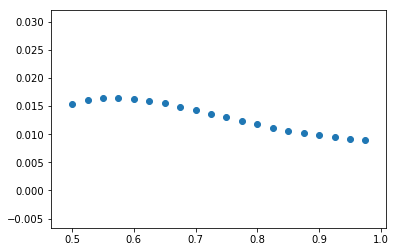

In [255]:
plt.show()

In [257]:
f, ax = plt.subplots()

In [258]:
ax.set_ylim([0.008,0.02])

(0.008, 0.02)

In [263]:
ax.scatter(width3, result3)

In [264]:
fig = plt.figure()

In [270]:
fig.add_subplot(111)

In [271]:
fig.show()

In [272]:
0.0446996/np.sqrt(75)

0.0051614652185337185

In [273]:
width3

array([ 0.5  ,  0.525,  0.55 ,  0.575,  0.6  ,  0.625,  0.65 ,  0.675,
        0.7  ,  0.725,  0.75 ,  0.775,  0.8  ,  0.825,  0.85 ,  0.875,
        0.9  ,  0.925,  0.95 ,  0.975])

In [274]:
result3

[0.015386885,
 0.016054055,
 0.016397422,
 0.016463624,
 0.016301921,
 0.015962737,
 0.015487866,
 0.014918775,
 0.014290972,
 0.013634974,
 0.012976308,
 0.012335577,
 0.011728612,
 0.01116671,
 0.010656971,
 0.010203473,
 0.0098056309,
 0.0094615258,
 0.0091670752,
 0.0089170309]